In [1]:
import tensorflow as tf
import numpy as np
import tensorflow_probability as tfp
import nnqs
import sampler
from hamiltonian import Ising1D
import optimizer

2025-07-12 10:06:22.063331: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752307582.087924  111674 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752307582.096651  111674 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1752307582.114410  111674 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1752307582.114432  111674 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1752307582.114435  111674 computation_placer.cc:177] computation placer alr

In [11]:
L = 40
n_spins = L * L
density = 4
n_hidden_spins = int(n_spins * density)

In [ ]:
wave_1 = nnqs.RBM(n_visible=L, n_hidden=n_hidden_spins)
print("a:", wave_1.a.numpy())
print("b:", wave_1.b.numpy())
print("W:", wave_1.W.numpy())
m_sampler_1 = sampler.GibbsSampler(n_visible=L, n_hidden=n_hidden_spins, k=5, batch_size=500)
#print("Initial state:", m_sampler.current_state)

ham = Ising1D(L=L, J=-1.0, h=0.0)

opt_1 = optimizer.StochasticReconfiguration(
    wave_function=wave_1,
    hamiltonian=ham,
    sampler=m_sampler_1,
    learning_rate=0.01,
    epsilon=0.0001,
)

a: [ 0.07390322 -0.1194032  -0.05297432  0.00036873]
b: [-0.10781664  0.03420406 -0.04362445  0.09187406 -0.00281547  0.06168606
 -0.01274269 -0.14606337 -0.05082239 -0.09294372 -0.20998836  0.16537358
  0.12902083 -0.06799792  0.25900826  0.04623546  0.01984651 -0.04199651
  0.05826819  0.05394905 -0.11766426 -0.04460583 -0.14554046 -0.06640146
 -0.01428197 -0.10818348  0.02801303  0.02071428  0.11158073 -0.07177216
 -0.00681771  0.0304475  -0.14366749 -0.00406157 -0.00873545 -0.10828914
 -0.04391208  0.02173379  0.1117983   0.02430722  0.12933391 -0.03209508
 -0.03640733 -0.00657191  0.14474475 -0.04776479 -0.06596037  0.07436622
 -0.26936248  0.08049186 -0.13647506  0.00055198 -0.06426103 -0.00740217
 -0.13415764  0.17100461  0.16887002  0.13805395  0.05218328 -0.00672991
 -0.00095554  0.06416666 -0.23467724 -0.1941899 ]
W: [[-0.04718104  0.00908841 -0.15449958 -0.11973051  0.11265922  0.11984497
  -0.22695163 -0.11980834  0.07836594  0.28308412  0.02783035  0.03226066
   0.16463448

I0000 00:00:1752307589.776609  111674 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 762 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1650 with Max-Q Design, pci bus id: 0000:01:00.0, compute capability: 7.5


In [ ]:
#results_vmc = opt.train(n_iterations=500)

In [4]:
results_sr = opt_1.train(n_iterations=1000)

I0000 00:00:1752307592.891922  111674 cuda_solvers.cc:175] Creating GpuSolver handles for stream 0x5643f1f2fb20


Iteration 0: Energy = -0.180000, Variance = 7.527600
Iteration 1: Energy = -0.024000, Variance = 8.015425
Iteration 2: Energy = -0.232000, Variance = 8.730176
Iteration 3: Energy = -0.632000, Variance = 10.160577
Iteration 4: Energy = -0.704000, Variance = 10.960384
Iteration 5: Energy = -0.888000, Variance = 9.723456
Iteration 6: Energy = -0.900000, Variance = 11.438000
Iteration 7: Energy = -1.124000, Variance = 13.368623
Iteration 8: Energy = -1.424000, Variance = 13.652223
Iteration 9: Energy = -1.992000, Variance = 13.519936
Iteration 10: Energy = -1.796000, Variance = 13.374384
Iteration 11: Energy = -2.176000, Variance = 14.577024
Iteration 12: Energy = -2.568000, Variance = 13.069376
Iteration 13: Energy = -2.304000, Variance = 14.707584
Iteration 14: Energy = -2.952000, Variance = 14.453695
Iteration 15: Energy = -3.372000, Variance = 14.317616
Iteration 16: Energy = -3.224000, Variance = 13.381824
Iteration 17: Energy = -3.800000, Variance = 14.215999
Iteration 18: Energy = -

In [5]:
# plot the results
import matplotlib.pyplot as plt

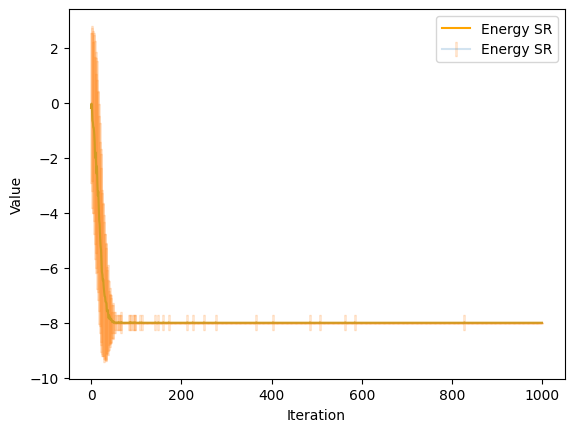

In [6]:
#plt.errorbar(
#    np.arange(len(results_vmc['energies'])),
#    results_vmc['energies'],
#    yerr=np.sqrt(results_vmc['variances']),
#    label='Energy VMC',
#    ecolor='tab:blue',
#    elinewidth=2,
#    alpha=0.2,
#    capsize=1
#)
plt.errorbar(
    np.arange(len(results_sr['energies'])),
    results_sr['energies'],
    yerr=np.sqrt(results_sr['variances']),
    label='Energy SR',
    ecolor='tab:orange',
    elinewidth=2,
    alpha=0.2,
    capsize=1
)
#plt.plot(results_vmc['energies'], label='Energy VMC', color='blue')
plt.plot(results_sr['energies'], label='Energy SR', color='orange')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()
plt.show()

In [9]:
#print(m_sampler.sample(wave)[0])
#print(m_sampler_1.sample(wave_1)[0])
print(m_sampler_1.sample(wave_1)[0])

tf.Tensor([1. 1. 1. 1.], shape=(4,), dtype=float32)
